## Illustrating Bagging by fitting various different fifth order polynomials

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
%matplotlib inline

### (a)

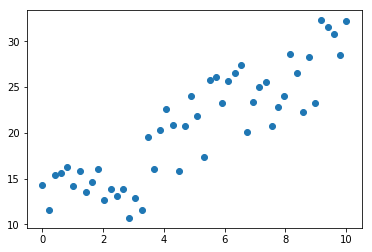

In [102]:
x = np.linspace(0, 10, 50)
y = 2*x + 5 + 10*np.random.rand(50)
plt.scatter(x,y)

### (b)
### Initial polynomial fit without bagging

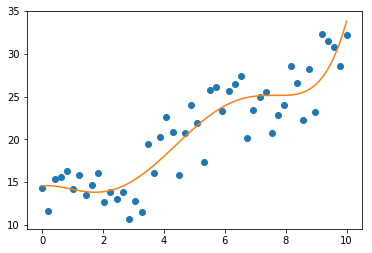

In [103]:
p = np.poly1d(np.polyfit(x, y, 5))
t = np.linspace(0, 10, 2000)
plt.plot(x, y, 'o', t, p(t), '-')

### Bagging Step - Take a subset of <i>j</i> points, fit a curve and take 50 such polynomial fits. 
Here, $6 \leq j \leq 50$, since we need atleast 6 points to fit a polynomial of degree 5.

In [104]:
poly_to_fit = []
poly = []
for i in range(100):
    temp = rd.sample(set([i for i in range(50)]),6)
    x_ = [x[i] for i in temp]
    y_ = [y[i] for i in temp]
    p_ = np.poly1d(np.polyfit(x_, y_, 5))
    t_ = np.linspace(0, 100, 20000)
    poly_to_fit.append(p_(t_))
    poly.append(p_)
final = np.zeros(len(poly_to_fit[0]))
for i in poly_to_fit:
    final+=i
final = final/len(poly_to_fit)

In [105]:
final

array([ 1.91568498e+03,  1.90834250e+03,  1.90102277e+03, ...,
       -1.11105079e+09, -1.11134901e+09, -1.11164729e+09])

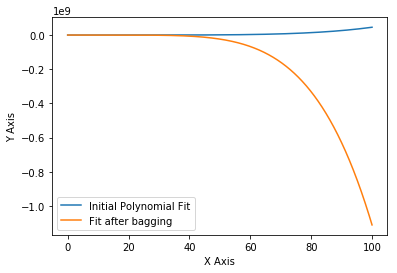

In [106]:
t = np.linspace(0,100,20000)
p = np.poly1d(np.polyfit(x, y, 5))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.plot(t,p(t), label = 'Initial Polynomial Fit')
plt.plot(t_,final, label = 'Fit after bagging')
plt.legend()
